
## Callable Bonds
 

Callable Feature: A callable bond grants the issuer the right to redeem (or "call back") the bond before its maturity date at predetermined call prices. This feature is advantageous for the issuer if interest rates decline, as it allows them to refinance at a lower cost.

**Advantages for Issuers**

From the issuer's perspective, the callable feature provides flexibility to refinance debt if market interest rates decline. This allows issuers to take advantage of lower borrowing costs by calling the existing bonds and issuing new ones at more favorable rates.

**Investor Considerations**

Investors should note that callable bonds typically offer higher yields compared to non-callable bonds. This higher yield compensates investors for the additional risk associated with the call feature, as the bond may be redeemed before maturity, potentially limiting the investor's interest income.



## Callable Bond Valuation

Valuing a callable bond involves calculating the present value of its cash flows while considering the possibility that the bond may be called at specific points in time.

### Key Terms in the Bond's Indenture

- **Coupon Rate**: The fixed interest rate that the bond pays to bondholders, expressed as a percentage of the face value. This rate is used to calculate periodic coupon payments.

- **Maturity Date**: The date on which the bond will mature, and the principal amount will be repaid to bondholders.

- **Face Value (Principal Amount)**: The amount that will be repaid to bondholders at maturity.

- **Call Provision**: Specifies whether the bond can be called (redeemed) before maturity, including any specific call dates and call prices.

- **Call Schedule**: Details the specific dates and prices at which the bond can be called before maturity.

- **Seniority and Security**: Information regarding the bond's ranking in terms of claims on assets in the event of liquidation, as well as whether it is secured or unsecured.


**Coupon Rate** is the annual interest rate paid on a bond, expressed as a percentage of its face value.

**Yield to Maturity (YTM)** is the total return anticipated on a bond if it is held until maturity. (YTM) is a market-derived rate that investors calculate based on the bond's current price and other relevant factors. It is expressed as an annual rate and considers the bond's current market price, coupon payments, and the time remaining until maturity. For callable bonds, YTM can also be influenced by the possibility of the bond being called before maturity.







### Example 1: Valuation of a Callable Bond



In [ ]:
import numpy as np

# Callable Bond Terms
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # 5% annual coupon rate 
maturity = 10  # 10 years to maturity
call_dates = [5, 7]  # Callable at year 5 and 7 
call_prices = [1020, 1010]  # Call prices: $1,020 at year 5 and $1,010 at year 7
yield_curve = [0.03, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]  # Yield curve

# Calculate annual coupon payment
coupon_payment = face_value * coupon_rate
    
# Calculate present value for cash flow for each year until maturity 
present_value = 0.0
for year in range(1, maturity + 1):
    if year in call_dates: # check if bond can be called this year
        call_index = call_dates.index(year)
        call_price = call_prices[call_index]
            
        # Calculate present value if called
        present_value_if_called = call_price / (1 + yield_curve[year - 1]) ** year
        present_value = max(present_value, present_value_if_called)
        
        # Present value of coupon payment
    present_value += coupon_payment / (1 + yield_curve[year - 1]) ** year
    
# Add the present value of face value at maturity
present_value += face_value / (1 + yield_curve[maturity - 1]) ** maturity

print(f"Present value of the Callable Bond is: ${present_value:.2f}")





Present value of the Callable Bond is: $1427.65



### Example 2: Valuation of a Callable Bond

A callable bond gives the issuer the right to redeem the bond before maturity at specified call prices. The issuer's decision to call the bond is influenced by the relationship between the bond's coupon rate and the prevailing market interest rates (YTM). As illustrated in the code below, the logic for determining whether to call the bond should take into account the current market conditions (i.e., the YTM) relative to the coupon rate. If the YTM is below the coupon rate, the issuer is more likely to call the bond because they can issue new debt at a lower interest rate.


In [1]:
import numpy as np

# Callable bond terms:
face_value = 400_000_000  # principal amount in USD
coupon_rate = 0.064  # annual coupon rate 6.4% - the interest payment is semiannual
maturity = 7  # 7 years to maturity 
call_dates = [3, 4, 5, 6]  # Callable at year 3, 4, 5, and 6
call_prices = [102.25, 101.75, 101.25, 101.00]  # Call price schedule as %

yield_curve = [0.03, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065]  # Example yield curve

# Calculate semi-annual coupon payment
coupon_payment = face_value * coupon_rate / 2

# Cash flows for each semiannual period until maturity
total_periods = maturity * 2  # number of periods (14)

present_value = 0.0  # Initialize to accumulate the present value of all bond's cash flows.
is_called = False  # Flag to check if the bond is called

for n in range(1, total_periods + 1):
    year = (n + 1) // 2  # Calculate the year based on the period
    
    # Calculate present value of coupon payment for every period
    present_value += coupon_payment / (1 + yield_curve[(n - 1) // 2] / 2) ** n
    
    # Check for Callable Years
    if year in call_dates and not is_called:  # If the bond can be called in this year
        call_index = call_dates.index(year)
        call_price = call_prices[call_index] * face_value / 100  # Convert percentage to actual amount
        
        # Calculate present value if called
        PV_if_called = call_price / (1 + yield_curve[year - 1] / 2) ** n  
        
        # Check if the issuer would call the bond
        if yield_curve[year - 1] < coupon_rate:  # If YTM is less than coupon rate
            present_value = PV_if_called  # Update present value to the call price present value
            is_called = True  # Mark that the bond has been called
            break  # Exit the loop since the bond is called

# If the bond was not called, add present value of face value at maturity
if not is_called:
    present_value += face_value / (1 + yield_curve[maturity - 1] / 2) ** total_periods

# Output the present value of the callable bond
print(f"The present value of the callable bond is: ${present_value:.2f}")


The present value of the callable bond is: $365937338.10




### Relationship Between YTM and Coupon Rate

- **When YTM < Coupon Rate**: If the YTM is lower than the coupon rate, the bond is trading at a premium (above par value). In this scenario, the issuer has an incentive to call the bond, as they can refinance at a lower interest rate. For example, if the YTM is 3% and the coupon rate is 6.4%, the issuer would likely call the bond to issue new debt at a lower rate.

- **When YTM = Coupon Rate**: If the YTM equals the coupon rate, the bond is trading at par value. In this case, the issuer may not have a strong incentive to call the bond, as they are paying a market rate of interest.

- **When YTM > Coupon Rate**: If the YTM is higher than the coupon rate, the bond is trading at a discount (below par value). In this situation, there is little incentive for the issuer to call the bond, as the refinancing costs (YTM) exceed the existing coupon payments. For instance, if the YTM is 6.5% and the coupon rate is 6.4%, the issuer would not benefit from calling the bond.



### Visualization 

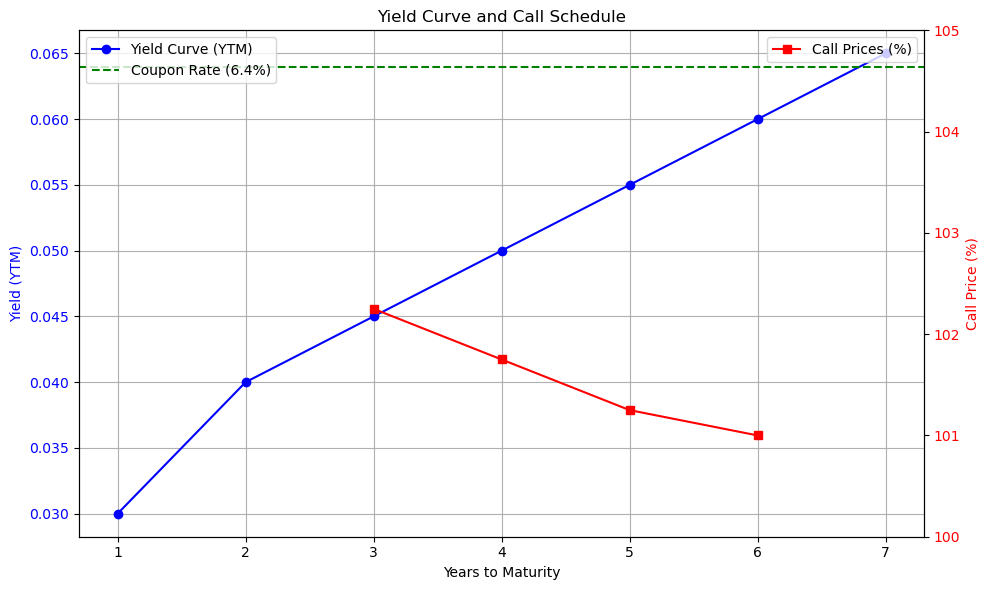

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = np.array([1, 2, 3, 4, 5, 6, 7])  # Years to maturity
yield_curve = np.array([0.03, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065])  # Yield curve
call_dates = np.array([3, 4, 5, 6])  # Callable at year 3, 4, 5, and 6
call_prices = np.array([102.25, 101.75, 101.25, 101.00])  # Call price schedule as %
coupon_rate = 0.064  # Annual coupon rate (6.4%)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot yield curve
ax1.plot(years, yield_curve, marker='o', color='b', label='Yield Curve (YTM)')
ax1.set_xlabel('Years to Maturity')
ax1.set_ylabel('Yield (YTM)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Yield Curve and Call Schedule')

# Plot Coupon Rate as a horizontal line
ax1.axhline(y=coupon_rate, color='g', linestyle='--', label='Coupon Rate (6.4%)')

# Create a second y-axis for call prices
ax2 = ax1.twinx()

# Plot Call Schedule
ax2.plot(call_dates, call_prices, marker='s', color='r', label='Call Prices (%)')
ax2.set_ylabel('Call Price (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(100, 105)  # Set y-axis limits for call prices

# Add grid and legends
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



# Conclusion

Valuing callable bonds requires a nuanced understanding of both the bond's cash flows and the market conditions that influence those cash flows. The presence of call options adds an additional layer of complexity compared to traditional non-callable bonds. Investors must consider not only the expected cash flows from coupon payments and principal repayment but also the potential for early redemption by the issuer, which can significantly impact the bond's value.

### Callable Bond Valuations in Real-Time

In real-time markets, the valuation of callable bonds can be quite complex due to several factors:

- **Interest Rate Volatility**: Fluctuations in interest rates can affect the likelihood of a bond being called. As rates decline, issuers are more likely to call their bonds, which can lead to reinvestment risk for investors.

- **Yield Curve Dynamics**: The shape and shifts in the yield curve can impact the discount rates used for present value calculations. Real-time data is essential for accurate valuations.

- **Market Sentiment**: Investor sentiment and macroeconomic factors can influence bond prices and yields, making it necessary to continuously monitor market conditions.

- **Modeling the Call Option**: The embedded call option requires sophisticated modeling techniques, such as option pricing models, to accurately assess its value. This adds complexity to the valuation process.

- **Regulatory and Credit Risk Considerations**: Changes in regulations or the creditworthiness of the issuer can also affect callable bond valuations, necessitating ongoing analysis.

In summary, while callable bonds can offer attractive yields, their valuation requires careful consideration of various dynamic factors. Investors must be equipped with robust analytical tools and real-time data to navigate the complexities of callable bond markets effectively.




## Other Bond Features

### Make-Whole Call Feature
Some bonds include a call feature known as a make-whole call, which differs from a fixed-price call. This type of call is common among highly rated bonds and gives issuers more flexibility to repurchase their debt. However, it usually requires the issuer to pay bondholders a premium based on the yield to maturity (YTM) of a similar sovereign bond.

### Putable Bonds
While callable bonds allow issuers greater flexibility to refinance their debt, putable bonds protect investors from rising interest rates. If interest rates increase and bond prices fall, bondholders can "put" the bond back to the issuer and reinvest the proceeds at higher rates.
